<a href="https://colab.research.google.com/github/nathanReitinger/4182-project1/blob/master/Perceptron_is_as_Perceptron_does.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The "Machine" and the "Learning" of Machine Learning

# AND Gate -- Naive ((( solution #1 )))
- create dictionary
- lookup input value
- return output based on dictionary lookup


In [8]:
def give_answer(input_string):
  '''function used to give correct output'''
  perceptron_dict = {'0,0': 0, '0,1': 0, '1,0': 0, '1,1': 1}
  to_return = perceptron_dict[input_string]
  return to_return

what_if_input_was = '0,0'
print("input (0,0) gives output:", give_answer(what_if_input_was))

what_if_input_was = '0,1'
print("input (0,1) gives output:", give_answer(what_if_input_was))

what_if_input_was = '1,0'
print("input (1,0) gives output:", give_answer(what_if_input_was))

what_if_input_was = '1,1'
print("input (1,1) gives output:", give_answer(what_if_input_was))


input (0,0) gives output: 0
input (0,1) gives output: 0
input (1,0) gives output: 0
input (1,1) gives output: 1


# AND Gate -- Formula (((solution #2 )))
- assume we know weights and bias term
- run input through formula
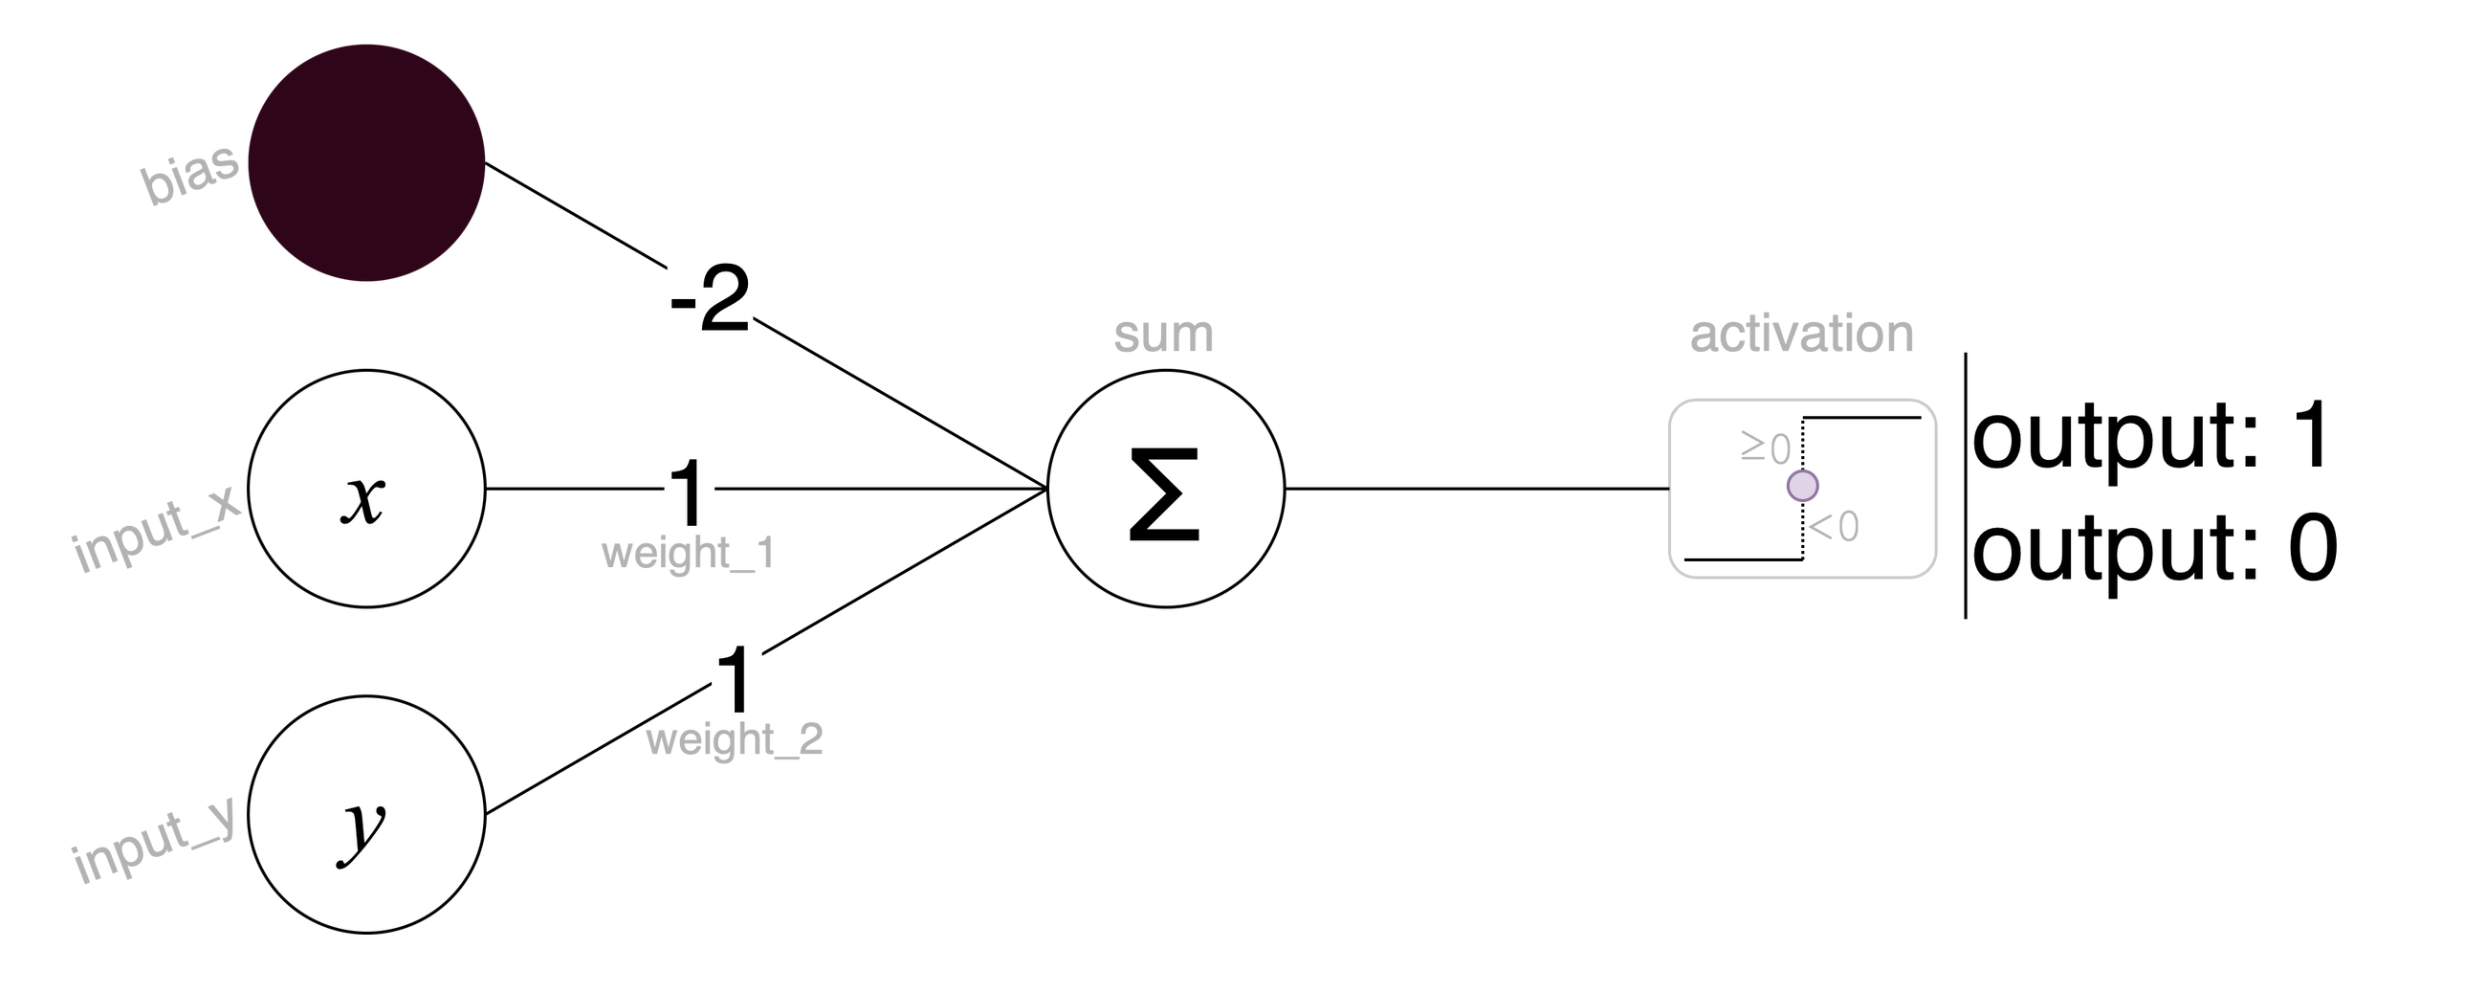

In [9]:
def and_gate_formula(input_x, input_y):
  '''function used to give correct output'''

  bias     = -2
  weight_1 = 1
  weight_2 = 1

  answer = bias + (input_x * weight_1) + (input_y * weight_2) ## this is a sum of bias, weight_1 times input_x, and weight_2 times input_y

  ## and here is the activation function
  if answer < 0:  ## if the sum output is less than 0, output 0
    return 0
  if answer >= 0: ## if the sum output is more than or equal to 0, output 1
    return 1

print("input (0,0) gives output:", and_gate_formula(0,0))

print("input (0,1) gives output:", and_gate_formula(0,1))

print("input (1,0) gives output:", and_gate_formula(1,0))

print("input (1,1) gives output:", and_gate_formula(1,1))

input (0,0) gives output: 0
input (0,1) gives output: 0
input (1,0) gives output: 0
input (1,1) gives output: 1


# AND Gate -- Machine Learning ((( solution #3 )))
- all we know is input and expected output (this is supervised learning)
- learn weights and bias term by running input through the formula over and over again (each run is called an epoch)

In [10]:
## this just installs some basic packages and loads them
!pip install keras_sequential_ascii
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Permute
import matplotlib.pyplot as plt
import keras

In [11]:
'''function used to give correct output'''
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")## input to test on and learn from
target_data =   np.array([[0]  ,[0]  ,[0]  ,[1]], "float32")  ## the ground truth
EPOCHS_TO_TRAIN_ON = 500                                      ## how many iterations to guess-and-check
model = Sequential()                                          ## type of model
model.add(Dense(16, input_dim=2, activation='relu'))          ## first layer of network
model.add(Dense(1, activation='sigmoid'))                     ## second layer of network
model.compile(loss='mean_squared_error',                      ## how to decide what 'error' means
              optimizer='adam',                               ## relates to gradient descent
              metrics=['accuracy'])                           ## how to report 'correctness'
history = model.fit(training_data, target_data, epochs=EPOCHS_TO_TRAIN_ON)
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## let's check that the model is giving the correct result

print("input (0,0) gives output:", (model.predict(np.array([[0,0]], "float32")).round()))
print("input (0,1) gives output:", (model.predict(np.array([[0,1]], "float32")).round()))
print("input (1,0) gives output:", (model.predict(np.array([[1,0]], "float32")).round()))
print("input (1,1) gives output:", (model.predict(np.array([[1,1]], "float32")).round()))


Epoch 1/500
1/1 [==============================] - 1s 817ms/step - loss: 0.2497 - accuracy: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2489 - accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2481 - accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2473 - accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2465 - accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2449 - accuracy: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2434 - accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 0.2427 - accuracy: 0.7500
Epoch 11/500
1/1 [=======

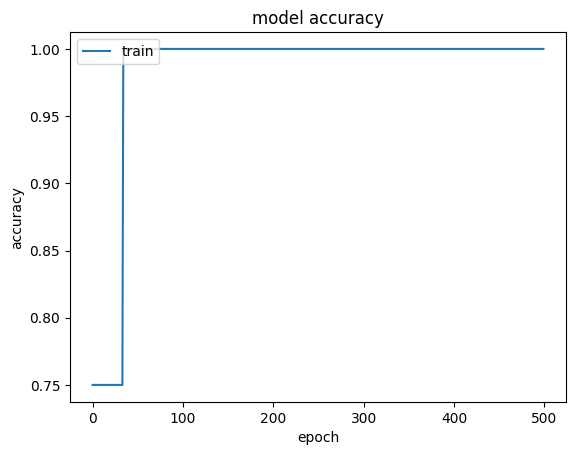

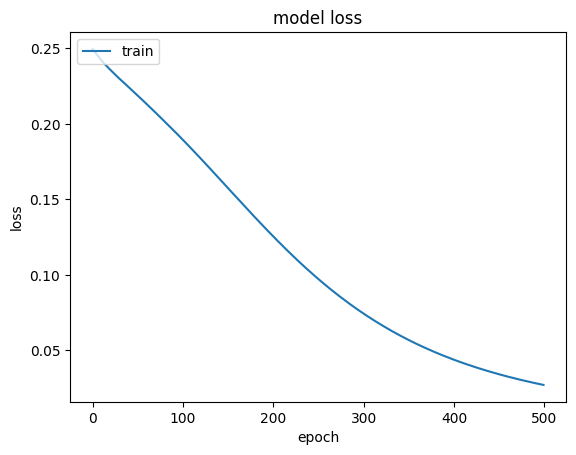

In [12]:
# print (model.predict(training_data).round())

## visualize training
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




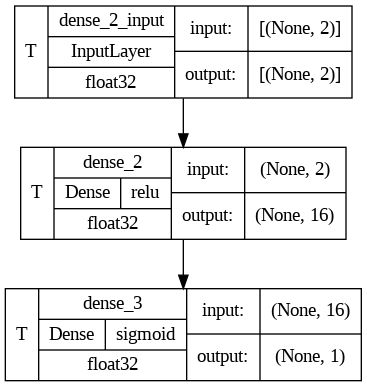

In [13]:
## what does this model's architecture look like
keras.utils.plot_model(model,  show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=True)



In [14]:
## more model network layout
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           2
               Dense   XXXXX -------------------        48    73.8%
                relu   #####          16
               Dense   XXXXX -------------------        17    26.2%
             sigmoid   #####           1


In [15]:
## what do the weights and bias term look like
print("how many layers are there in this model: ", len(model.layers))
weights_first_layer, biases_first_layer = model.layers[0].get_weights()
print("\n\nbias terms for first layer\n", biases_first_layer)
print("\n\nweights for first layer\n", weights_first_layer)
print("\n\n------")
weights_second_layer, biases_second_layer = model.layers[1].get_weights()
print("\n\nbias terms for second layer\n", biases_second_layer)
print("\n\nweights for second layer\n", weights_second_layer)


how many layers are there in this model:  2


bias terms for first layer
 [-0.03460589 -0.0802795   0.4365659   0.         -0.02386342  0.37015408
 -0.42866904 -0.32720217 -0.41868013  0.410816    0.          0.52417296
  0.          0.38314104  0.36049604  0.29585412]


weights for first layer
 [[ 0.69139755  0.06372552 -0.2475181  -0.22217357 -0.5091508  -0.8301939
   0.5589001   0.32721666  0.744683   -0.257081   -0.49755767 -0.6575231
  -0.36566788  0.04417224  0.489134    0.24814898]
 [ 0.03456543 -0.23440194 -0.18615372 -0.14443597  0.00218756  0.46012482
   0.7134824   0.8059215   0.4474163   0.06908055 -0.574407    0.1339478
  -0.29285038 -0.02570047 -0.84906286 -0.5440815 ]]


------


bias terms for second layer
 [-0.31040132]


weights for second layer
 [[ 0.1927847 ]
 [ 0.1876206 ]
 [-0.82460016]
 [ 0.04387367]
 [ 0.5146123 ]
 [-0.54745746]
 [ 0.98282295]
 [ 0.74821204]
 [ 1.0833354 ]
 [-0.88835245]
 [ 0.02857763]
 [-0.56552726]
 [ 0.27302086]
 [-1.08747   ]
 [-0.6858491 ]
